# Data Analysis

In [13]:
#Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure

In [2]:
# Import Cleaned WineData to DF
df = pd.read_csv('archive/clean_winedata.csv', index_col=0)
# Import Cleaned LocationData to DF
df_location = pd.read_csv('archive/location_coords.csv', index_col=0)

# Import Cleaned WeatherData to DF
weather_clean = pd.read_csv('archive/weather_data.csv', index_col=0)

In [5]:
df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
5,Tandem,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Spain,Northern Spain,Navarra,15.0,87,Michael Schachner,Blackberry and raspberry aromas show a typical...,Ars In Vitro
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


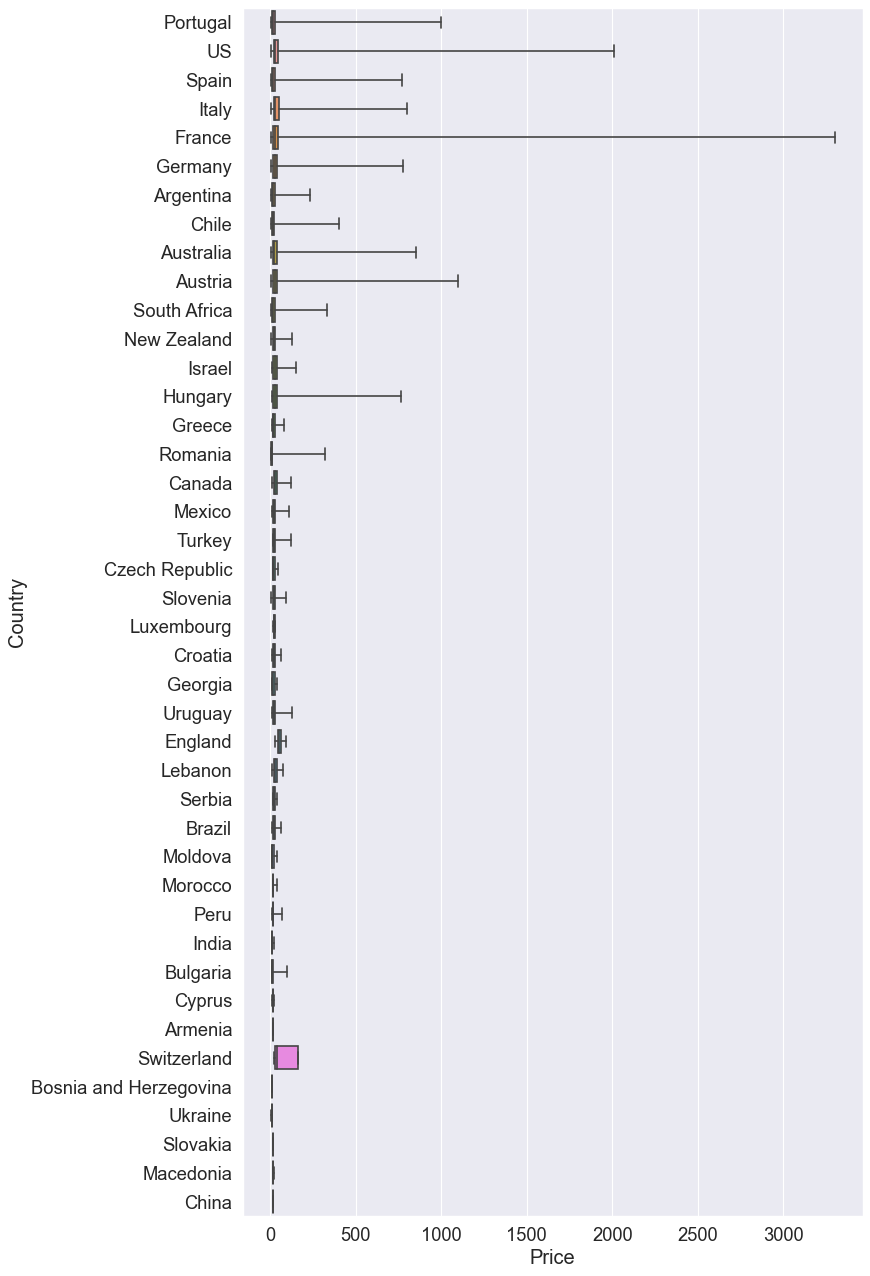

In [19]:
# Displaying boxplot/IQR of prices of wines by country
figure(figsize=(10,20), dpi=80)
country = sns.boxplot(y="Country", x="Price", data=df, whis=np.inf)
#country = sns.stripplot(y="Country", x="Price", data=df, color=".3")
country = sns.set(rc={'figure.figsize':(20,80)}, font_scale= 1.5)

In [4]:
#Describing the main data frame
df.describe()

,Price,Points
count,96479.000000,96479.000000
mean,34.998642,88.585723
std,43.057234,2.951305
min,4.000000,80.000000
25%,17.000000,87.000000
50%,25.000000,88.000000
75%,40.000000,91.000000
max,3300.000000,100.000000


## Question 1: Which Country has the highest average score and price of wines

In [6]:
#Grouping Data by Country
country_group = df.groupby(by= 'Country')
#Finding mean of country data
country_df = country_group.mean()
country_df

,Price,Points
Country,,
Argentina,24.452438,86.707701
Armenia,14.500000,87.500000
Australia,37.492277,88.805680
Austria,30.782157,90.204228
Bosnia and Herzegovina,12.500000,86.500000
Brazil,23.765957,84.659574
Bulgaria,14.645390,87.936170
Canada,35.636364,89.367589
Chile,20.869686,86.514286


### AVERAGE PRICE BY COUNTRY

In [7]:
#Sorting Data by Price(Ascending)
price_df = country_df.sort_values(by= 'Price')
price_df

,Price,Points
Country,,
Ukraine,9.214286,84.071429
Bosnia and Herzegovina,12.500000,86.500000
India,13.333333,90.222222
Armenia,14.500000,87.500000
Bulgaria,14.645390,87.936170
Romania,15.241667,86.400000
Macedonia,15.583333,86.833333
Slovakia,16.000000,87.000000
Cyprus,16.272727,87.181818


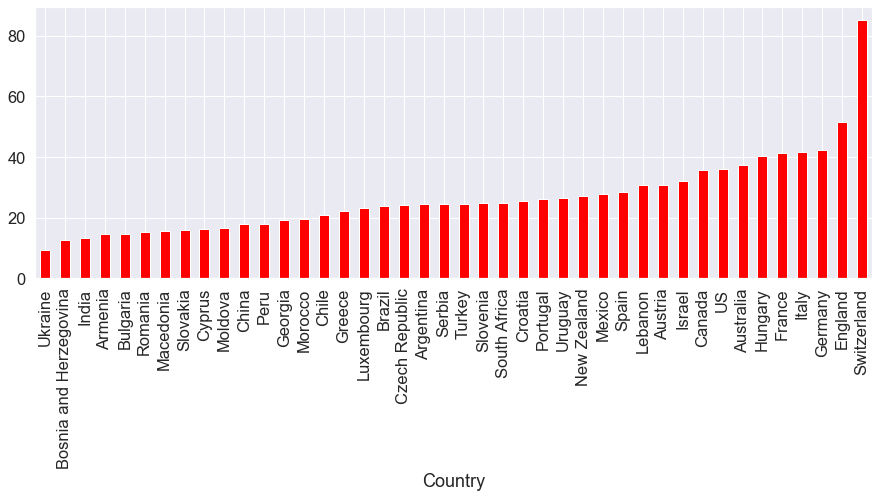

In [8]:
#Visualizing average price of a bottle of reviewed wine per country
plot = price_df["Price"].plot(kind="bar", facecolor="red", figsize=(15,5));
#ADD AXIS LABELS AND TITLES
fig = plot.get_figure()
fig.savefig('country_price.png')

Based on the above graph, we determined that Switzerland has the highest average price per wine. We were curious to see what the data for Switzerland looked like....

In [9]:
#Examining Switzerland data
swiss_df = df[df['Country'] == 'Switzerland']
swiss_df.head()

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
14187,Robert Gilliard,Robert Gilliard 2012 Dôle des Monts Pinot Noir...,Pinot Noir-Gamay,Switzerland,Valais,NaN,30.0,90,Jeff Jenssen,"A Swiss blend of Pinot Noir and Gamay, this de...",Dôle des Monts
21791,Gantenbein,Gantenbein 2011 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine is cherry red with soft brown tinges...,NaN
32423,Gantenbein,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine has a bouquet of tart cherry with a ...,NaN
50589,Delea,Delea 2004 Carato Merlot (Ticino),Merlot,Switzerland,Ticino,NaN,38.0,83,Susan Kostrzewa,"A soft blackberry, vanilla and plum nose is fo...",Carato
81814,Gantenbein,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine has a bouquet of tart cherry with a ...,NaN


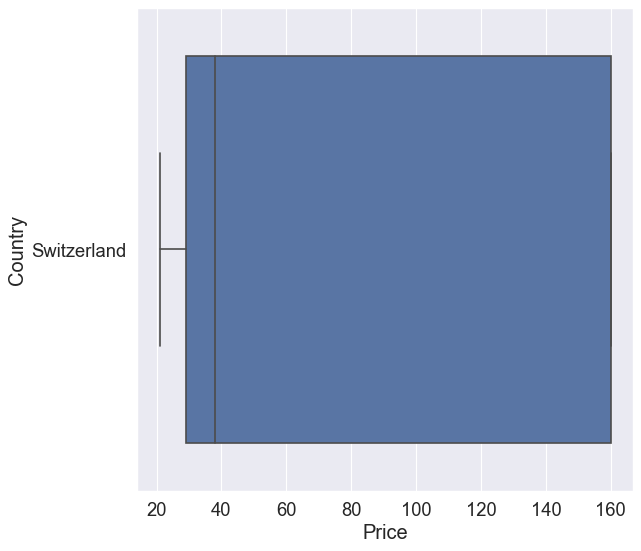

In [14]:
#Boxplot of Switzerland to try and uncover any outliers
#add a box plot + stripchart
figure(figsize=(8,8), dpi=80)
swiss = sns.boxplot(x="Price", y="Country", data=swiss_df, whis=np.inf)
#swiss = sns.stripplot(x="Price", y="Country", data=swiss_df, color=".3")
fig = swiss.get_figure()
fig.savefig('swiss_box.png')

In [15]:
#Describing Swiss Data
swiss_df.describe()

,Price,Points
count,7.000000,7.000000
mean,85.285714,88.571429
std,70.063577,2.507133
min,21.000000,83.000000
25%,29.000000,89.000000
50%,38.000000,89.000000
75%,160.000000,90.000000
max,160.000000,90.000000


### AVERAGE POINTS BY COUNTRY

In [20]:
#Sorting Data by Points(Ascending)
points_df = country_df.sort_values(by= 'Points')
points_df

,Price,Points
Country,,
Peru,18.062500,83.562500
Ukraine,9.214286,84.071429
Brazil,23.765957,84.659574
Mexico,27.800000,85.261538
Romania,15.241667,86.400000
Bosnia and Herzegovina,12.500000,86.500000
Chile,20.869686,86.514286
Argentina,24.452438,86.707701
Uruguay,26.403670,86.752294


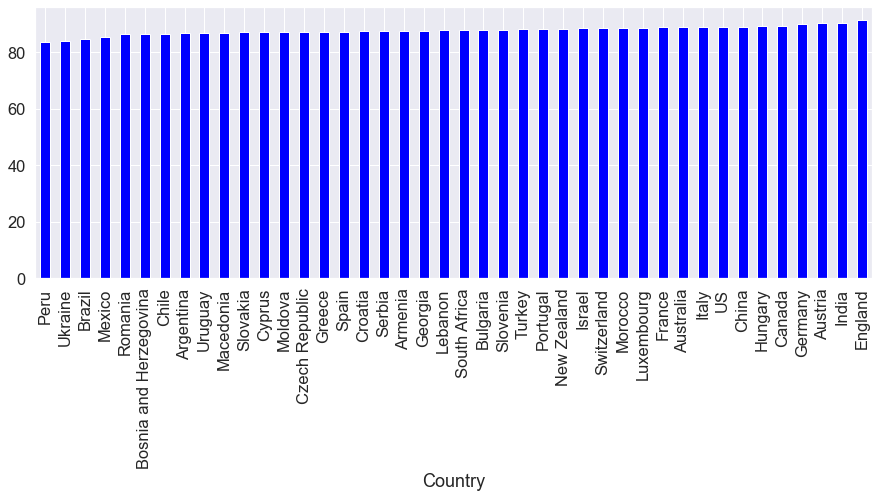

In [21]:
#Plotting bar chart showing avg points given to a btl reviewed wine in each country
plot2 = points_df["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig2 = plot2.get_figure()
fig2.savefig('country_points.png')

Based on the above graph, we saw that England was the country who scored the highest on average points. This lead us to wonder... what is the average cost for the average consumer per point rating in each country?

### AVERAGE COST PER AVERAGE POINT

In [22]:
#Adding new column to uncover the average $ it costs consumers per point rating in each country
country_df['Average Price per Point ($)'] = round(country_df['Price']/country_df['Points'],2)
country_df

,Price,Points,Average Price per Point ($)
Country,,,
Argentina,24.452438,86.707701,0.28
Armenia,14.500000,87.500000,0.17
Australia,37.492277,88.805680,0.42
Austria,30.782157,90.204228,0.34
Bosnia and Herzegovina,12.500000,86.500000,0.14
Brazil,23.765957,84.659574,0.28
Bulgaria,14.645390,87.936170,0.17
Canada,35.636364,89.367589,0.40
Chile,20.869686,86.514286,0.24


In [23]:
#Sorting data by Avg Price per point
ppp_df = country_df.sort_values(by= 'Average Price per Point ($)')
ppp_df

,Price,Points,Average Price per Point ($)
Country,,,
Ukraine,9.214286,84.071429,0.11
Bosnia and Herzegovina,12.500000,86.500000,0.14
India,13.333333,90.222222,0.15
Armenia,14.500000,87.500000,0.17
Bulgaria,14.645390,87.936170,0.17
Romania,15.241667,86.400000,0.18
Slovakia,16.000000,87.000000,0.18
Macedonia,15.583333,86.833333,0.18
Cyprus,16.272727,87.181818,0.19


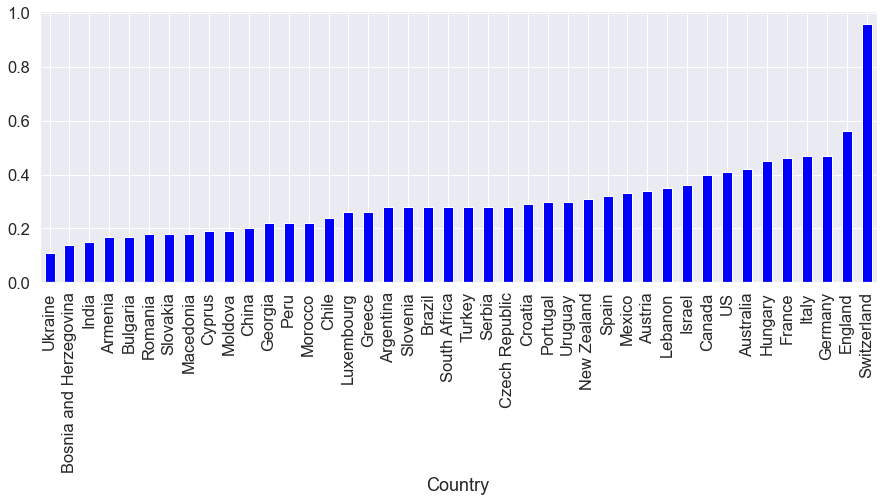

In [24]:
#Plotting Avg PPP data
plot3 = ppp_df["Average Price per Point ($)"].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig3 = plot3.get_figure()
fig3.savefig('country_avg.png')

Unsurprisingly, Switzerland had the highest average cost to points ratio. Interestingly, high quality wines for the lowest price are made in the Ukraine.

## Question 2: Which country has the highest amount of wines reviewed

### REVIEWS PER COUNTRY

In [27]:
#Displaying how many wines were reviewed per country
dfg = df.groupby(by= 'Country').count()
dfg = dfg[['Wine Critic']]
dfg = dfg.sort_values(by= 'Wine Critic')
dfg

,Wine Critic
Country,
Slovakia,1
China,1
Armenia,2
Bosnia and Herzegovina,2
Luxembourg,6
Switzerland,7
India,9
Cyprus,11
Macedonia,12


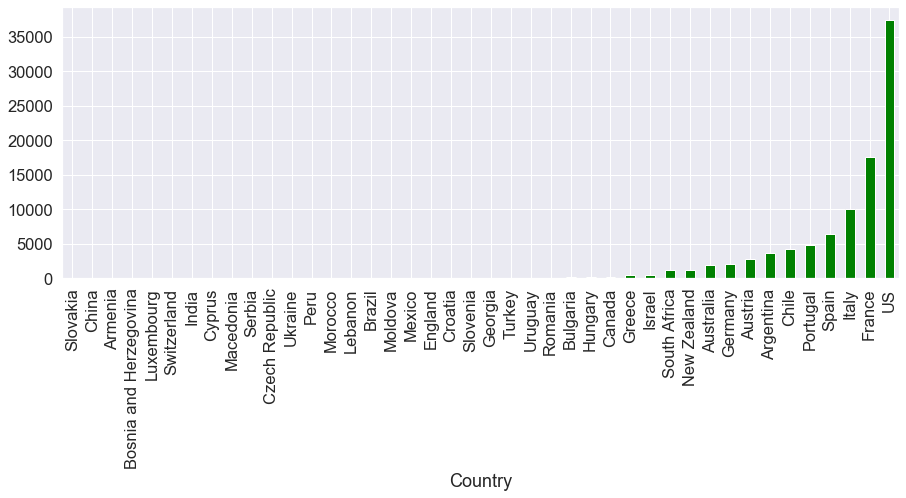

In [28]:
#Plotting in bar chart the amount of reviews per country
plot4 = dfg['Wine Critic'].plot(kind='bar', facecolor='green', figsize=(15,5))
fig4 = plot4.get_figure()
fig4.savefig('country_total_reviews.png')

Based on the above graph, most of the wines reviewed were in the US.

## Question 3: What is the average score/price for each province?

In [45]:
df['Province'].describe()

count          96420
unique           417
top       California
freq           20042
Name: Province, dtype: object

Given that there are 417 unique provinces in this dataset we felt this question might be more meaningfully answered by looking at the top 25 provinces.

In [41]:
# Creating groups based on province
prov_grp = df.groupby(by='Province')

# Finding the top 25 provinces
prov_var = prov_grp.count()
prov_sorted = prov_var.sort_values(by='Winery', ascending=False)
prov25 = prov_sorted.head(25)

# Assigning the group by DF index to a list
top_prov = prov25.index

# Creating top_province dataframe
tp = pd.DataFrame(top_prov)

# Create groups based on province and aggrgate by mean.
tp_mean = df.groupby(by='Province').mean()

# Merge top 25 province list wtih Mean group df to only keep data for wine reviews in the top 25 provinces
tp_merge = pd.merge(tp, tp_mean, how='left', right_index=True, left_on= 'Province')
tp_merge = tp_merge.set_index('Province')


tp_merge

,Price,Points
Province,,
California,39.881100,89.338639
Washington,32.454810,88.955802
Oregon,36.620327,89.064062
Bordeaux,38.998246,87.970677
Northern Spain,30.880340,87.434863
Tuscany,46.362943,88.892552
Mendoza Province,24.986658,86.823456
Burgundy,71.141748,89.644660
New York,22.917988,87.261122


###  AVERAGE PRICE BY PROVINCE

In [42]:
#Sorting province data by price in ascending
tp_price = tp_merge.sort_values(by='Price', ascending=False)
tp_price

,Price,Points
Province,,
Champagne,79.477511,90.290855
Burgundy,71.141748,89.644660
Piedmont,57.926101,89.876362
Tuscany,46.362943,88.892552
South Australia,41.035897,89.275214
California,39.881100,89.338639
Bordeaux,38.998246,87.970677
Rhône Valley,38.869059,89.018429
Veneto,37.861004,88.511583


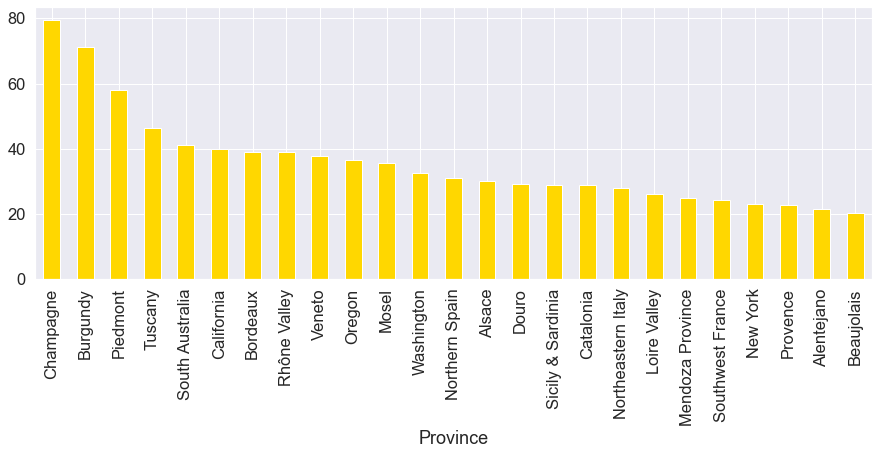

In [46]:
#Plotting bar chart to show avg price of btl by province
plot9 = tp_price['Price'].plot(kind='bar', facecolor='Gold', figsize=(15,5));
fig9 = plot9.get_figure()
fig9.savefig('province_price.png')

Based on the above graph, the highest average price per province we see in Champagne France with an average of $79.47/bottle.

### AVERAGE POINT BY PROVINCE

In [47]:
#Sorting province data by points in ascending
tp_points = tp_merge.sort_values(by='Points')
tp_points

,Price,Points
Province,,
Mendoza Province,24.986658,86.823456
New York,22.917988,87.261122
Northern Spain,30.880340,87.434863
Catalonia,28.743363,87.532743
Bordeaux,38.998246,87.970677
Alentejano,21.492083,87.992692
Beaujolais,20.349882,88.100473
Provence,22.719392,88.290438
Northeastern Italy,28.002506,88.355890


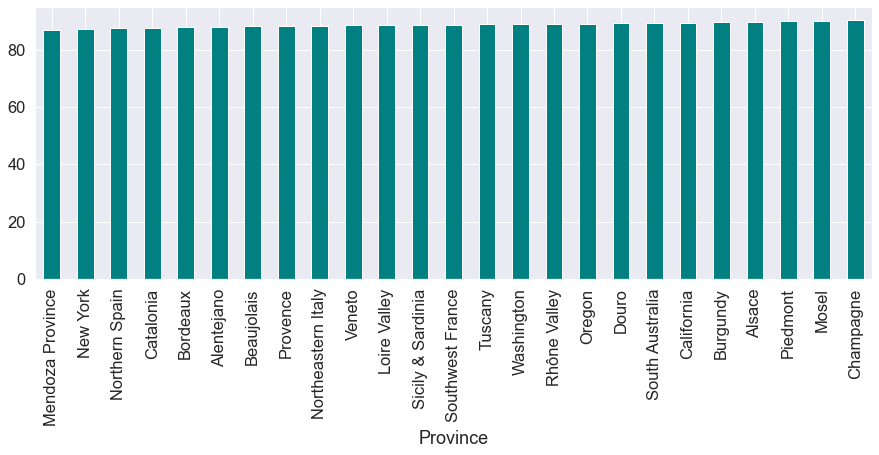

In [48]:
#Plotting bar chart to show avg points of btl by province
plot10 = tp_points['Points'].plot(kind='bar', facecolor='Teal', figsize=(15,5));
fig10 = plot10.get_figure()
fig10.savefig('province_points.png')

Based on the above graph, the highest average point per province we see in Champagne France as well. As with the previous question, we wanted to look at what the average price in dollars per point is by province.

## AVERAGE PRICE PER POINT BY PROVINCE

In [49]:
#Creating new column calculating the avergae price of the wine per point given by province
tp_merge['Average Price per Point ($)'] = round(tp_merge['Price']/tp_merge['Points'],2)
tp_merge

,Price,Points,Average Price per Point ($)
Province,,,
California,39.881100,89.338639,0.45
Washington,32.454810,88.955802,0.36
Oregon,36.620327,89.064062,0.41
Bordeaux,38.998246,87.970677,0.44
Northern Spain,30.880340,87.434863,0.35
Tuscany,46.362943,88.892552,0.52
Mendoza Province,24.986658,86.823456,0.29
Burgundy,71.141748,89.644660,0.79
New York,22.917988,87.261122,0.26


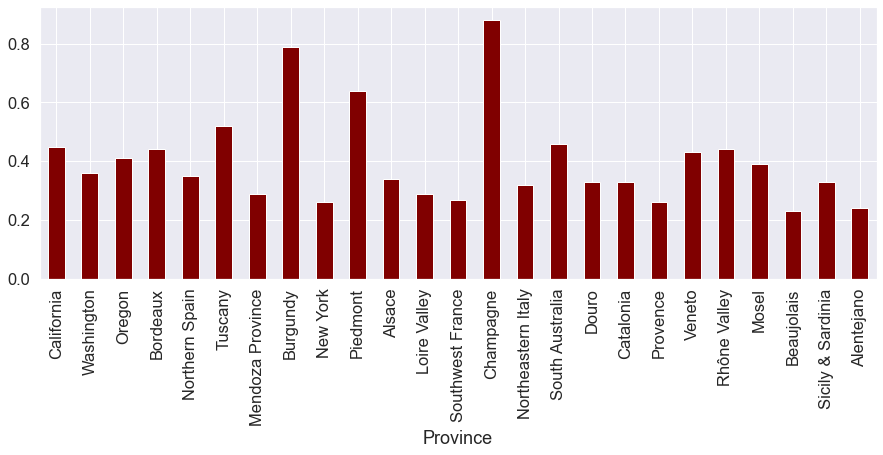

In [50]:
#Plotting Avg PPP data
plot11 = tp_merge['Average Price per Point ($)'].plot(kind='bar', facecolor='Maroon', figsize=(15,5));
fig11 = plot11.get_figure()
fig11.savefig('province_avg.png')

Champagne has the highest cost per point of the top 25 provinces. 
The region with the best value by these metrics would be Beaujolais.

## Question 4: Which Top 25 Wine varietal has the highest average price per bottle and points per bottle?

In [56]:
df['Grape Type'].describe()

count          96479
unique           659
top       Pinot Noir
freq            9835
Name: Grape Type, dtype: object

Like with provinces, there were too many grape types to visualize so we decided to take the top 25

In [55]:
# Creating groups based on varietal
df_varietal = df.groupby(by='Grape Type')

# Finding the top 25 varietals
df_var = df_varietal.count()
df_sorted = df_var.sort_values(by='Winery', ascending=False)
df25 = df_sorted.head(25)

# Assigning the group by DF index to a list
top_grape = df25.index

# Creating top_grape dataframe
tg = pd.DataFrame(top_grape)

# Create groups based on grape type and aggrgate by mean.
tg_mean = df.groupby(by='Grape Type').mean()

# Merge top 25 grapes list wtih Mean group df to only keep data for wine reviews in the top 25 grapes
tg_merge = pd.merge(tg, tg_mean, how='left', right_index=True, left_on='Grape Type' )
tg_merge = tg_merge.set_index('Grape Type')

tg_merge

,Price,Points
Grape Type,,
Pinot Noir,49.247178,89.642095
Chardonnay,36.351658,88.569741
Red Blend,35.563485,88.512989
Cabernet Sauvignon,44.019355,88.531935
Bordeaux-style Red Blend,44.574336,88.732766
Riesling,32.619733,89.571671
Sauvignon Blanc,20.392085,87.589951
Syrah,40.577506,89.722204
Rosé,18.530828,86.984833


### AVERAGE PRICE BY VERITAL

In [57]:
# Sorting verital data by price in decending
tg_price = tg_merge.sort_values(by='Price', ascending=False)
tg_price

,Price,Points
Grape Type,,
Champagne Blend,73.794848,89.854646
Nebbiolo,64.992023,90.254131
Sangiovese,50.057566,88.997807
Pinot Noir,49.247178,89.642095
Bordeaux-style Red Blend,44.574336,88.732766
Cabernet Sauvignon,44.019355,88.531935
Syrah,40.577506,89.722204
Chardonnay,36.351658,88.569741
Red Blend,35.563485,88.512989


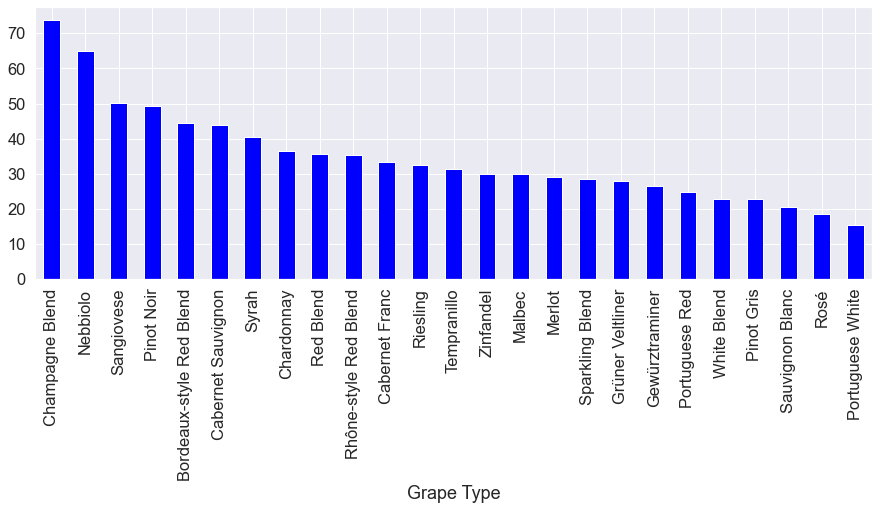

In [58]:
# Plotting bar chart to show avg price of btl by varietal
plot12 = tg_price['Price'].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig12 = plot12.get_figure()
fig12.savefig('grape_price.png')

Based on the above graph, the top grape varietal based on price are Champagne blend wines with the highest average price at $73.79/bottle

### AVERAGE POINTS BY VARIETAL

In [59]:
# Sorting varietal data by points in decending
tg_pts = tg_merge.sort_values(by='Points', ascending=False)
tg_pts

,Price,Points
Grape Type,,
Nebbiolo,64.992023,90.254131
Grüner Veltliner,27.804749,90.026385
Champagne Blend,73.794848,89.854646
Syrah,40.577506,89.722204
Pinot Noir,49.247178,89.642095
Riesling,32.619733,89.571671
Rhône-style Red Blend,35.231079,89.440419
Sangiovese,50.057566,88.997807
Portuguese Red,24.819217,88.864299


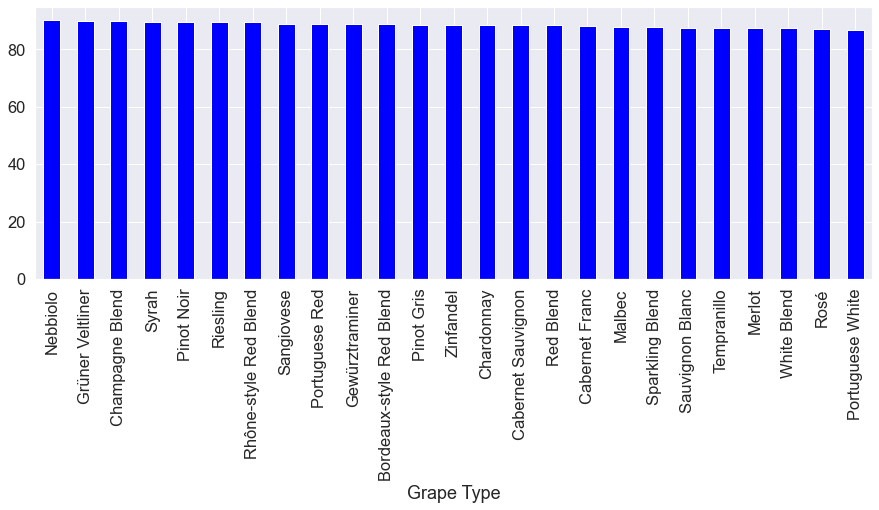

In [60]:
# Plotting bar chart to show avg points of btl by verital
plot13 = tg_pts['Points'].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig13 = plot13.get_figure()
fig13.savefig('province_points.png')

Based on the above graph, the Nebbiolo grape has the highest average rating at 90.25/bottle.

### AVERAGE PRICE PER POINT BY VARIETAL

In [62]:
# Creating new column calculating the avergae price of the wine per point given by varietal
tg_merge['Average Price per Point ($)'] = round(tg_merge['Price']/tg_merge['Points'],2)
tg_merge

,Price,Points,Average Price per Point ($)
Grape Type,,,
Pinot Noir,49.247178,89.642095,0.55
Chardonnay,36.351658,88.569741,0.41
Red Blend,35.563485,88.512989,0.40
Cabernet Sauvignon,44.019355,88.531935,0.50
Bordeaux-style Red Blend,44.574336,88.732766,0.50
Riesling,32.619733,89.571671,0.36
Sauvignon Blanc,20.392085,87.589951,0.23
Syrah,40.577506,89.722204,0.45
Rosé,18.530828,86.984833,0.21


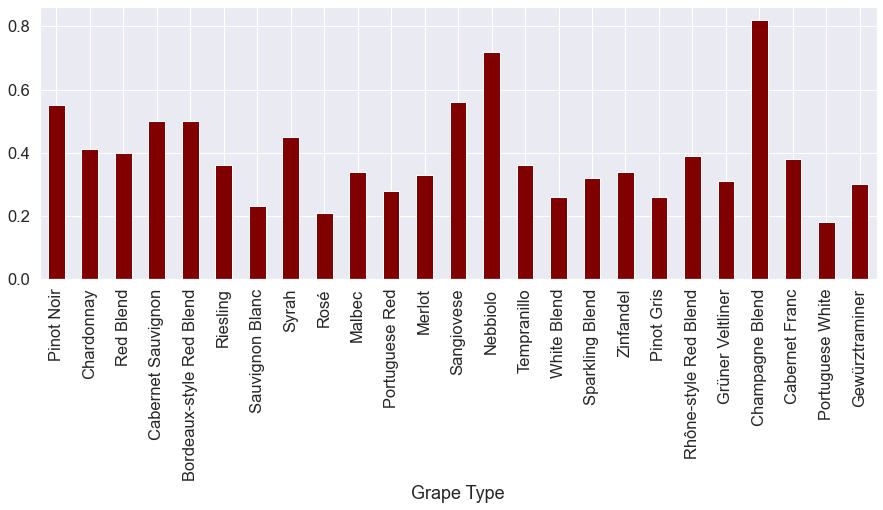

In [63]:
# Plotting Avg PPP data
plot14 = tg_merge['Average Price per Point ($)'].plot(kind='bar', facecolor='Maroon', figsize=(15,5));
fig14 = plot14.get_figure()
fig14.savefig('province_avg.png')

Based on the above graph, Portugese white has the lowest cost per point.

## QUESTION 5: Which wine ciritic gives the highest average score

### AVERAGE POINTS BY CRITIC

In [33]:
#Finding the mean for Price and Points in a Wine Crtic Groupby
crit_mean = critic_group.mean()
crit_mean

,Price,Points
Wine Critic,,
Alexander Peartree,29.053269,85.854722
Anna Lee C. Iijima,29.790112,88.405127
Anne Krebiehl MW,31.230135,90.612419
Carrie Dykes,30.753623,86.384058
Christina Pickard,29.333333,87.833333
Fiona Adams,31.148148,86.888889
Jeff Jenssen,22.234216,88.319756
Jim Gordon,26.935507,88.625989
Joe Czerwinski,35.175579,88.539505


In [34]:
#Sorting Data by Points in Ascending
crit_points = crit_mean.sort_values(by= 'Points')
crit_points

,Price,Points
Wine Critic,,
Alexander Peartree,29.053269,85.854722
Carrie Dykes,30.753623,86.384058
Susan Kostrzewa,22.908667,86.620690
Fiona Adams,31.148148,86.888889
Michael Schachner,25.231155,86.909237
Lauren Buzzeo,24.492703,87.564507
Christina Pickard,29.333333,87.833333
Jeff Jenssen,22.234216,88.319756
Anna Lee C. Iijima,29.790112,88.405127


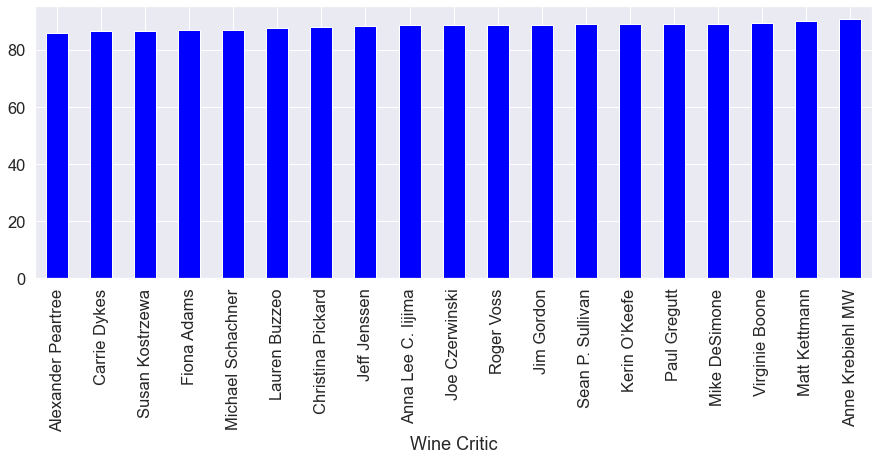

In [35]:
#Plotting mean of points by critic 
plot6 = crit_points["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig6 = plot6.get_figure()
fig6.savefig('critic_points.png')

Based on the graph above, Anne Krebiehl MW gives the highest average scores. This lead us to wonder which critics tended to review the most expensive wines.

### AVERAGE PRICE BY CRITIC

In [36]:
#Sorting wine critic data by price in ascending
crit_price = crit_mean.sort_values(by= 'Price')
crit_price

,Price,Points
Wine Critic,,
Jeff Jenssen,22.234216,88.319756
Susan Kostrzewa,22.908667,86.620690
Lauren Buzzeo,24.492703,87.564507
Michael Schachner,25.231155,86.909237
Jim Gordon,26.935507,88.625989
Mike DeSimone,28.164683,89.099206
Alexander Peartree,29.053269,85.854722
Christina Pickard,29.333333,87.833333
Anna Lee C. Iijima,29.790112,88.405127


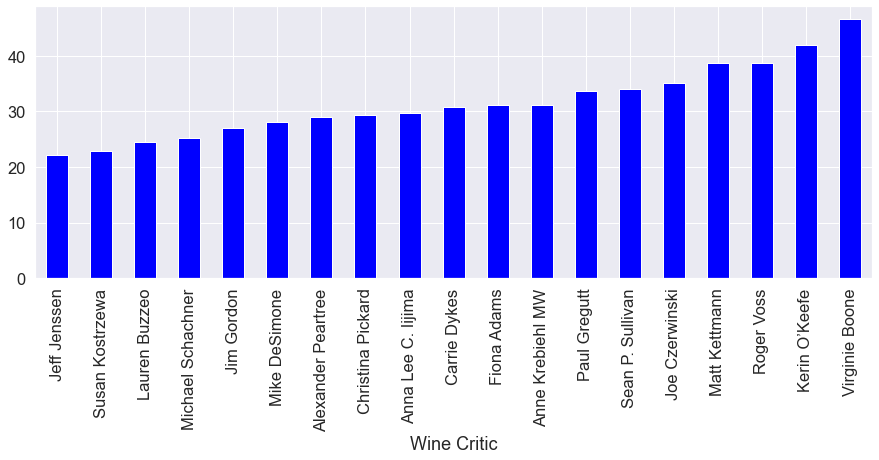

In [37]:
#Plotting bar chart to show avg price of btl reviewed by each critic
plot7 = crit_price["Price"].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig7 = plot7.get_figure()
fig7.savefig('critic_price.png')

Based on the graph above, Virginie Boone reviews bottles at the highest average price.

### AVERAGE PRICE PER POINT BY CRITIC

In [38]:
#Creating new column calculating the avergae price of the wine per point given by each critic
crit_mean['Average Price per Point ($)'] = round(crit_mean['Price']/crit_mean['Points'],2)
crit_mean

,Price,Points,Average Price per Point ($)
Wine Critic,,,
Alexander Peartree,29.053269,85.854722,0.34
Anna Lee C. Iijima,29.790112,88.405127,0.34
Anne Krebiehl MW,31.230135,90.612419,0.34
Carrie Dykes,30.753623,86.384058,0.36
Christina Pickard,29.333333,87.833333,0.33
Fiona Adams,31.148148,86.888889,0.36
Jeff Jenssen,22.234216,88.319756,0.25
Jim Gordon,26.935507,88.625989,0.30
Joe Czerwinski,35.175579,88.539505,0.40


In [39]:
#Sorting the new average in ascending
crit_avg = crit_mean.sort_values(by= 'Average Price per Point ($)')
crit_avg

,Price,Points,Average Price per Point ($)
Wine Critic,,,
Jeff Jenssen,22.234216,88.319756,0.25
Susan Kostrzewa,22.908667,86.620690,0.26
Lauren Buzzeo,24.492703,87.564507,0.28
Michael Schachner,25.231155,86.909237,0.29
Jim Gordon,26.935507,88.625989,0.30
Mike DeSimone,28.164683,89.099206,0.32
Christina Pickard,29.333333,87.833333,0.33
Alexander Peartree,29.053269,85.854722,0.34
Anna Lee C. Iijima,29.790112,88.405127,0.34


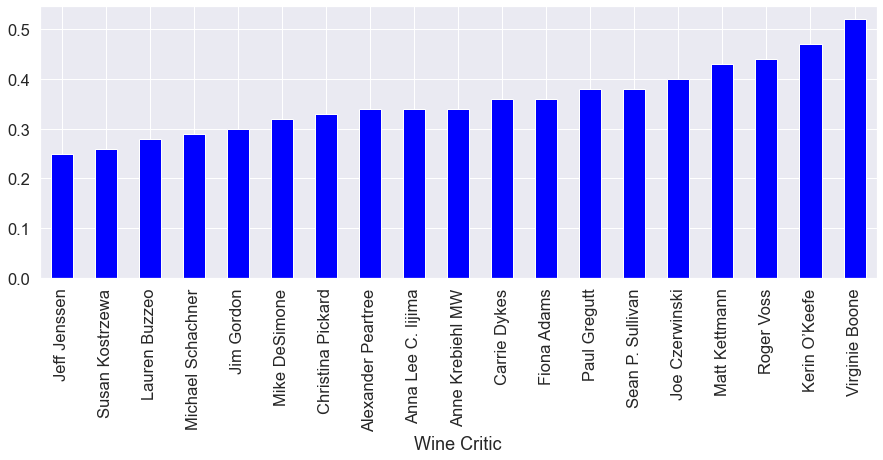

In [40]:
#Plotting bar chart to show the new sorted data
plot8 = crit_avg["Average Price per Point ($)"].plot(kind="bar", facecolor="blue", figsize=(15,5));
fig8 = plot8.get_figure()
fig8.savefig('critic_avg.png')

So we did the average cost/point and found that Virginia Boone’s reviews offer the least amount of value more than double Jeff Jenssen.

### REVIEWS PER CRITIC

In [51]:
#Grouping Data by Wine Critic
critic_group = df.groupby(by= 'Wine Critic')

critic_df = critic_group.count()
critic_df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Description,Additional Designations
Wine Critic,,,,,,,,,,
Alexander Peartree,413,413,413,413,413,399,413,413,413,268
Anna Lee C. Iijima,4369,4369,4369,4369,4369,2438,4369,4369,4369,3469
Anne Krebiehl MW,3398,3398,3398,3389,3389,1360,3398,3398,3398,2894
Carrie Dykes,138,138,138,138,138,138,138,138,138,96
Christina Pickard,6,6,6,6,6,6,6,6,6,2
Fiona Adams,27,27,27,27,27,18,27,27,27,17
Jeff Jenssen,491,491,491,469,469,0,491,491,491,383
Jim Gordon,4171,4171,4171,4171,4171,4165,4171,4171,4171,2656
Joe Czerwinski,5012,5012,5012,5010,5010,3324,5012,5012,5012,3339


In [52]:
#Counting how many reviews each critic has done
crit_df = critic_df[['Winery']]
crit_df

,Winery
Wine Critic,
Alexander Peartree,413
Anna Lee C. Iijima,4369
Anne Krebiehl MW,3398
Carrie Dykes,138
Christina Pickard,6
Fiona Adams,27
Jeff Jenssen,491
Jim Gordon,4171
Joe Czerwinski,5012


In [53]:
#Sorting data in Ascending order
crit_sort = crit_df.sort_values(by= 'Winery')
crit_sort

,Winery
Wine Critic,
Christina Pickard,6
Fiona Adams,27
Carrie Dykes,138
Alexander Peartree,413
Jeff Jenssen,491
Mike DeSimone,504
Susan Kostrzewa,1073
Lauren Buzzeo,1713
Anne Krebiehl MW,3398


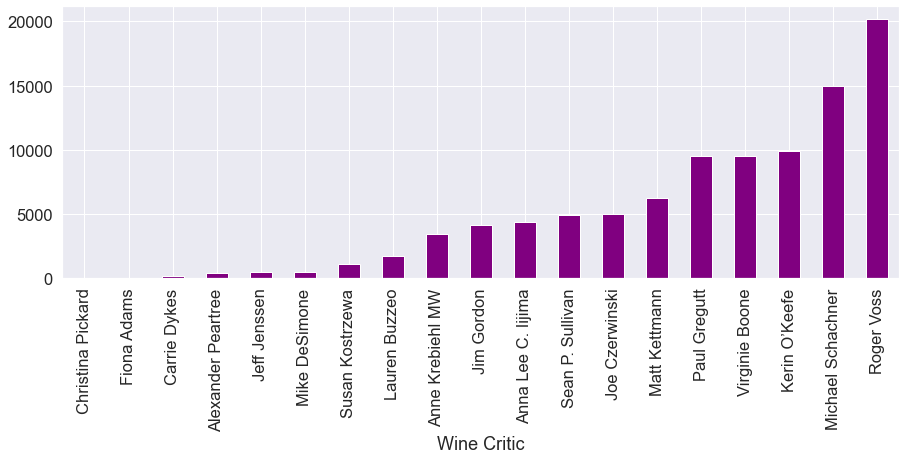

In [54]:
#Plotting bar chart to show how many reviews done per critic
plot5 = crit_sort['Winery'].plot(kind='bar', facecolor='purple', figsize=(15,5))
fig5 = plot5.get_figure()
fig5.savefig('critic_review_totals.png')

This shows that there is indeed one reviewer who far surpasses others: Roger Voss consists of 20% of the reviews. Christina Pickard only has 6 reviews meanwhile Roger Voss is a writing machine with 20172 reviews under his belt. This shows us that the data may be a bit skewed. 

## Question 6: Is there a relationship between price and points compared to the geographical location (Latitude) of the wine's region?

### LATITUDE VS TEMPERATURE

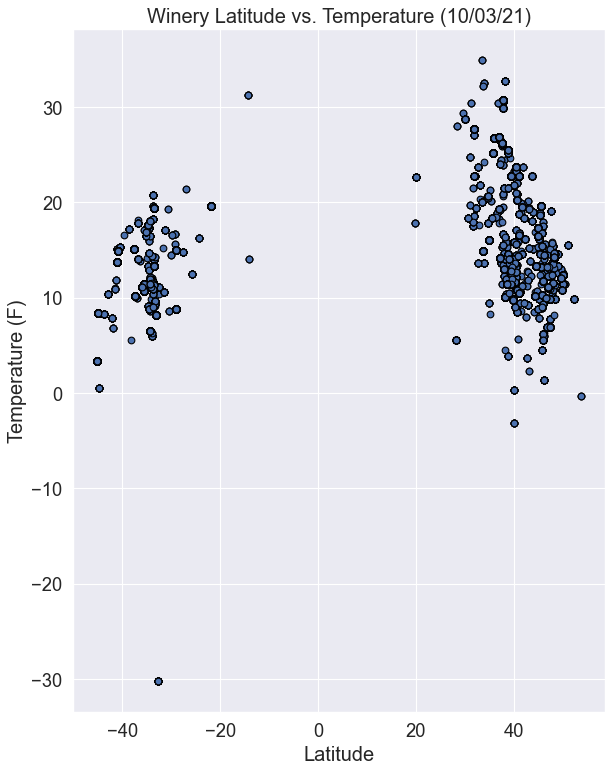

In [64]:
# assigning dataframe series to list for plotting
x_values = weather_clean['Lat']
y_values = weather_clean['Temp']
figure(figsize=(8,10), dpi=80)

# Plot scatter plot
plot16 = plt.scatter(x_values,y_values, edgecolors="black")

# Lable chart
plt.title('Winery Latitude vs. Temperature (10/03/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid(b=True, axis='both')
plt.tight_layout()

# Save plot as png
fig16 = plot16.get_figure()
fig16.savefig("archive/lat_temp.png")
plt.show();

Based on the graph above, we could see there may be a correlational relationship between temperature and latitude but based on the hemispheres.

### Northern and Southern Hemisphere Latitude vs Temperature

In [65]:
# Create bins for different Hemispheres
bins = [-90, -.1, 90]

group_names = ['Southern Hemisphere', 'Northern Hemisphere']

weather_clean["Hemisphere"] = pd.cut(weather_clean['Lat'], bins, 
                                  labels=group_names, include_lowest=True)

#Filter by the bins
north_df = weather_clean[weather_clean['Hemisphere']=="Northern Hemisphere"]
south_df = weather_clean[weather_clean['Hemisphere']=="Southern Hemisphere"]

The r-value is: -0.410961036619561


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


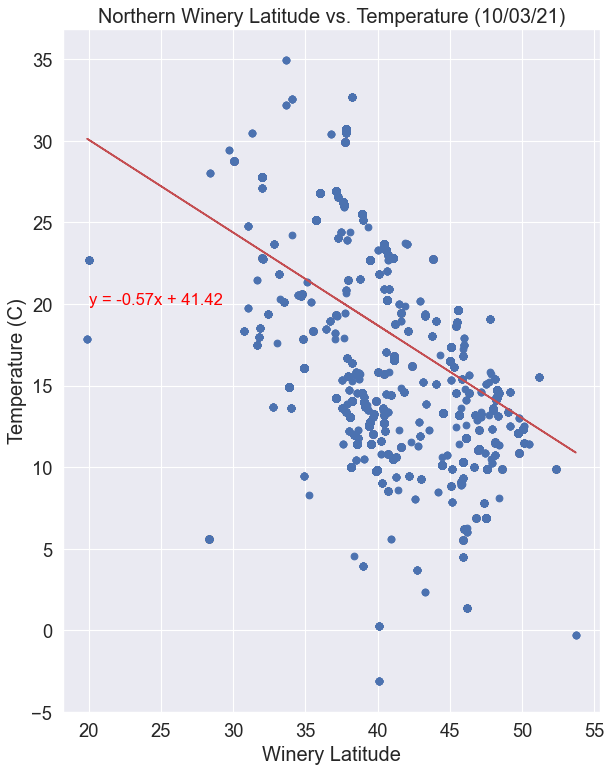

In [80]:
# assigning dataframe series to list for plotting
x_values = north_df['Lat']
y_values = north_df['Temp']
figure(figsize=(8,10), dpi=80)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plot17 = plt.scatter(x_values,y_values)
fig17 = plot17.get_figure()
plt.plot(x_values,regress_values,"r-")

# Lable graph
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Winery Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Winery Latitude vs. Temperature (10/03/21)')
print(f"The r-value is: {rvalue}")

# Save plot as png
fig17.savefig("archive/north_lat_temp_regression.png")
fig17.tight_layout()
fig17.show();

The r-value is: 0.7927066155590377


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


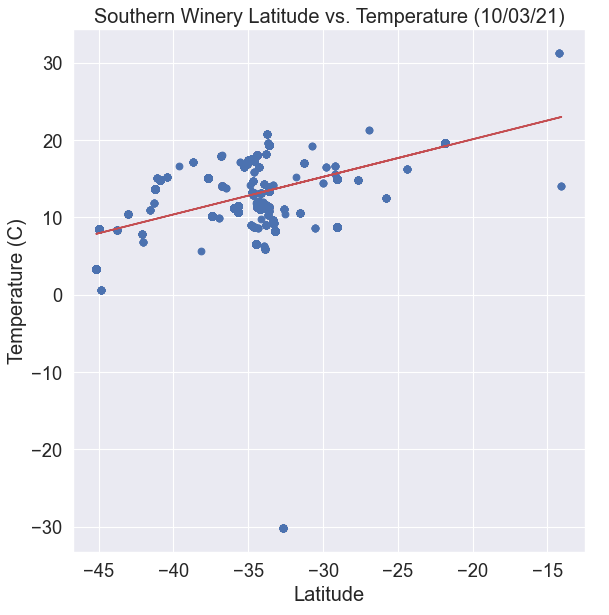

In [81]:
# assigning dataframe series to list for plotting
x_values = south_df['Lat']
y_values = south_df['Temp']
figure(figsize=(8,8), dpi=80)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plot18 = plt.scatter(x_values,y_values)
fig18 = plot18.get_figure()
plt.plot(x_values,regress_values,"r-")

# Lable graph
plt.annotate(line_eq,(-20,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Winery Latitude vs. Temperature (10/03/21)')
print(f"The r-value is: {rvalue}")

# Save plot as png
fig18.savefig("archive/south_lat_temp_regression.png")
fig18.tight_layout()
fig18.show();

### Northern and Southern Hemisphere Latitude vs Price

The r-value is: 0.011436934881023462


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


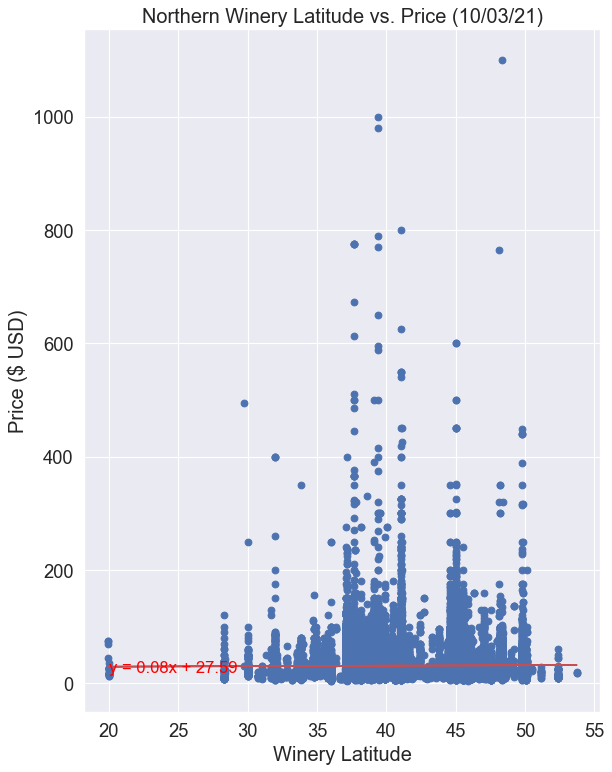

In [82]:
# assigning dataframe series to list for plotting
x_values = north_df['Lat']
y_values = north_df['Price']
figure(figsize=(8,10), dpi=80)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plot19 = plt.scatter(x_values,y_values)
fig19 = plot19.get_figure()
plt.plot(x_values,regress_values,"r-")

# Lable graph
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Winery Latitude')
plt.ylabel('Price ($ USD)')
plt.title('Northern Winery Latitude vs. Price (10/03/21)')
print(f"The r-value is: {rvalue}")

# Save plot as png
fig19.savefig("archive/north_lat_price_regression.png")
fig19.tight_layout()
fig19.show();

The r-value is: 0.012730244167818146


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


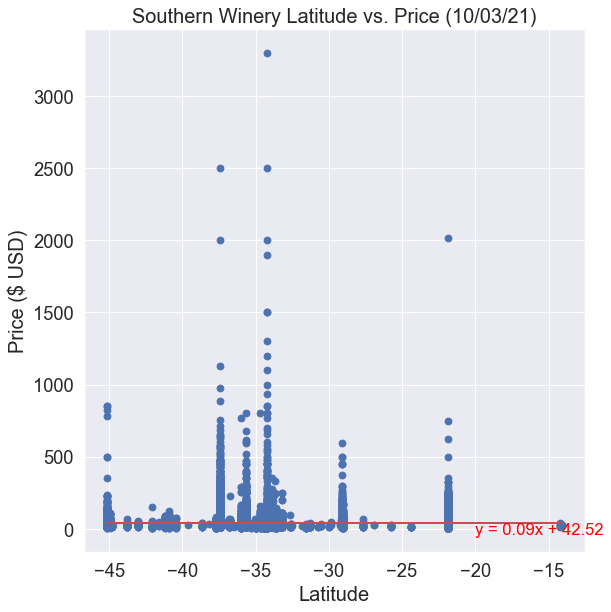

In [83]:
# assigning dataframe series to list for plotting
x_values = south_df['Lat']
y_values = south_df['Price']
figure(figsize=(8,8), dpi=80)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plot20 = plt.scatter(x_values,y_values)
fig20 = plot20.get_figure()
plt.plot(x_values,regress_values,"r-")

# Lable graph
plt.annotate(line_eq,(-20,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Price ($ USD)')
plt.title('Southern Winery Latitude vs. Price (10/03/21)')
print(f"The r-value is: {rvalue}")

# Save plot as png
fig20.savefig("archive/south_lat_price_regression.png")
fig20.tight_layout()
fig20.show();

### Northern and Southern Hemisphere Latitude vs Points

The r-value is: 0.0528661810695739


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


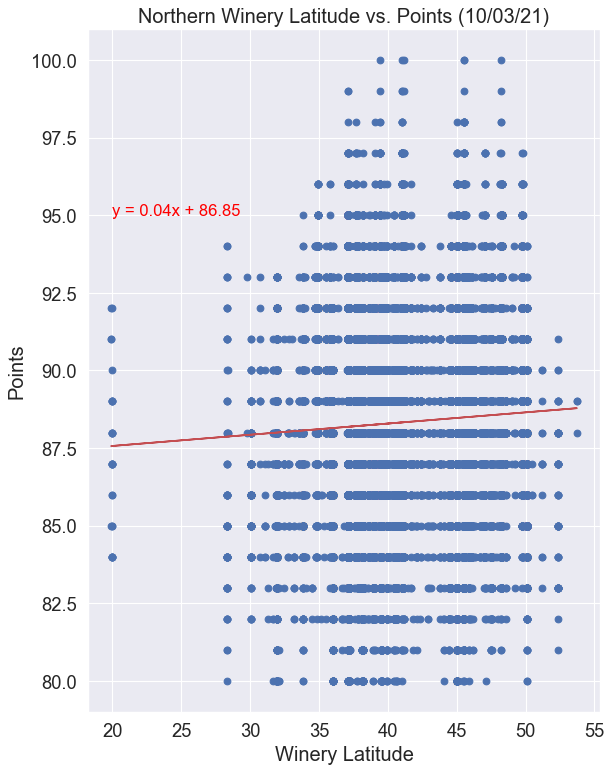

In [87]:
# assigning dataframe series to list for plotting
x_values = north_df['Lat']
y_values = north_df['Points']
figure(figsize=(8,10), dpi=80)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plot21 = plt.scatter(x_values,y_values)
fig21 = plot21.get_figure()
plt.plot(x_values,regress_values,"r-")

# Lable graph
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.xlabel('Winery Latitude')
plt.ylabel('Points')
plt.title('Northern Winery Latitude vs. Points (10/03/21)')
print(f"The r-value is: {rvalue}")

# Save plot as png
fig21.savefig("archive/north_lat_points_regression.png")
fig21.tight_layout()
fig21.show();

The r-value is: 0.14996738405093019


/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


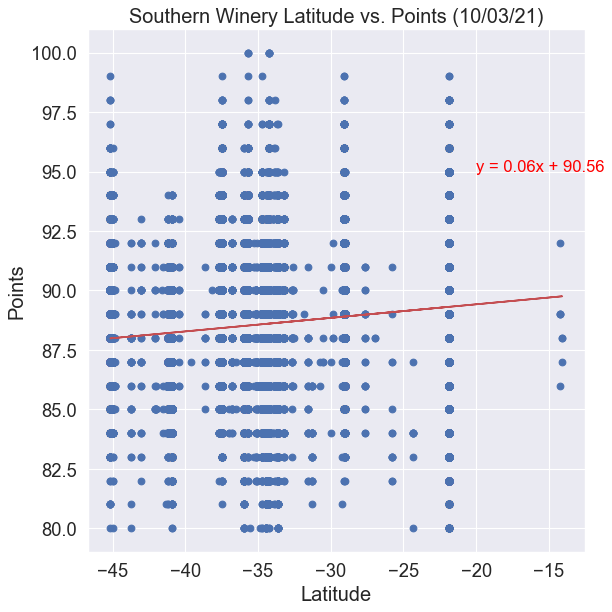

In [90]:
# assigning dataframe series to list for plotting
x_values = south_df['Lat']
y_values = south_df['Points']
figure(figsize=(8,8), dpi=80)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plot22 = plt.scatter(x_values,y_values)
fig22 = plot22.get_figure()
plt.plot(x_values,regress_values,"r-")

# Lable graph
plt.annotate(line_eq,(-20,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Points')
plt.title('Southern Winery Latitude vs. Points (10/03/21)')
print(f"The r-value is: {rvalue}")

# Save plot as png
fig22.savefig("archive/south_lat_points_regression.png")
fig22.tight_layout()
fig22.show();

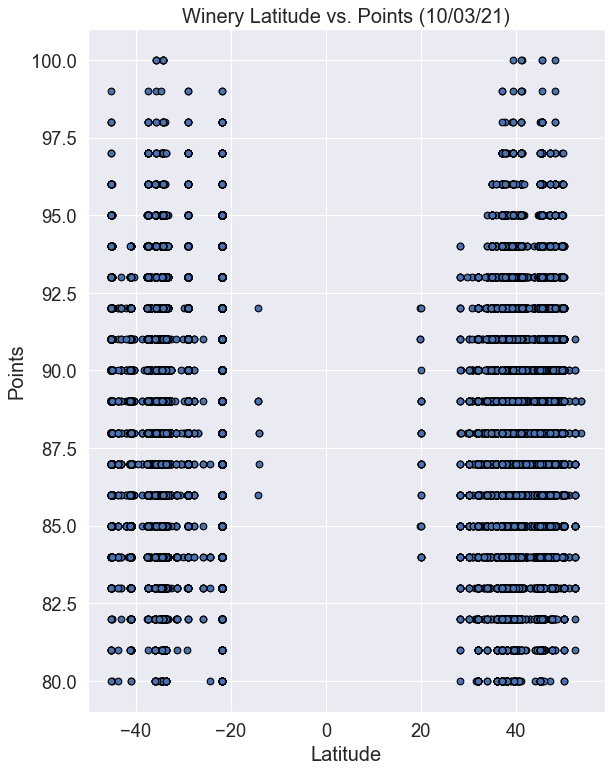

In [89]:
# assigning dataframe series to list for plotting
x_values = weather_clean['Lat']
y_values = weather_clean['Points']
figure(figsize=(8,10), dpi=80)

# Plot scatter plot
plot23 = plt.scatter(x_values,y_values, edgecolors="black")

# Lable chart
plt.title('Winery Latitude vs. Points (10/03/21)')
plt.xlabel('Latitude')
plt.ylabel('Points')
plt.grid(b=True, axis='both')
plt.tight_layout()

# Save plot as png
fig23 = plot23.get_figure()
fig23.savefig("archive/lat_points.png")
plt.show();